# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Important libraries
import numpy as np
import pandas as pd
import random

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# feture selection
from sklearn.feature_selection import SequentialFeatureSelector

# measuring performance
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, make_scorer

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Helper Functions

In [ ]:
#Function to evaluate the performance of the model using classification report and plot the confusion matrix using heatmap
from sklearn.metrics import plot_confusion_matrix
def evaluate_model(model, X_test, y_test, title=''):
  figure, ax = plt.subplots(figsize=(12, 12))
  plot_confusion_matrix(model, X_test, y_test, ax=ax) 
  plt.title(title)
  plt.show()

In [ ]:
def plotModels(models, title = '', xlabel = '', ylabel = ''):
  for i in models:
    plt.bar(i[0], i[1])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# Using NSL_KDD dataset (Multiclass)

## Dataset Preprocessing

In [ ]:
#Import the dataset
nsl_dataset_train = pd.read_csv('/content/drive/MyDrive/AI for CS/Final Project Datasets/NSL_KDD_train.csv', index_col=[0])

In [ ]:
nsl_dataset_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21


### Explore the dataset

In [ ]:
print('Shape of dataset', nsl_dataset_train.shape)

Shape of dataset (125973, 43)


In [ ]:
nsl_dataset_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,10.625483,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.636084,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,11.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,21.000000


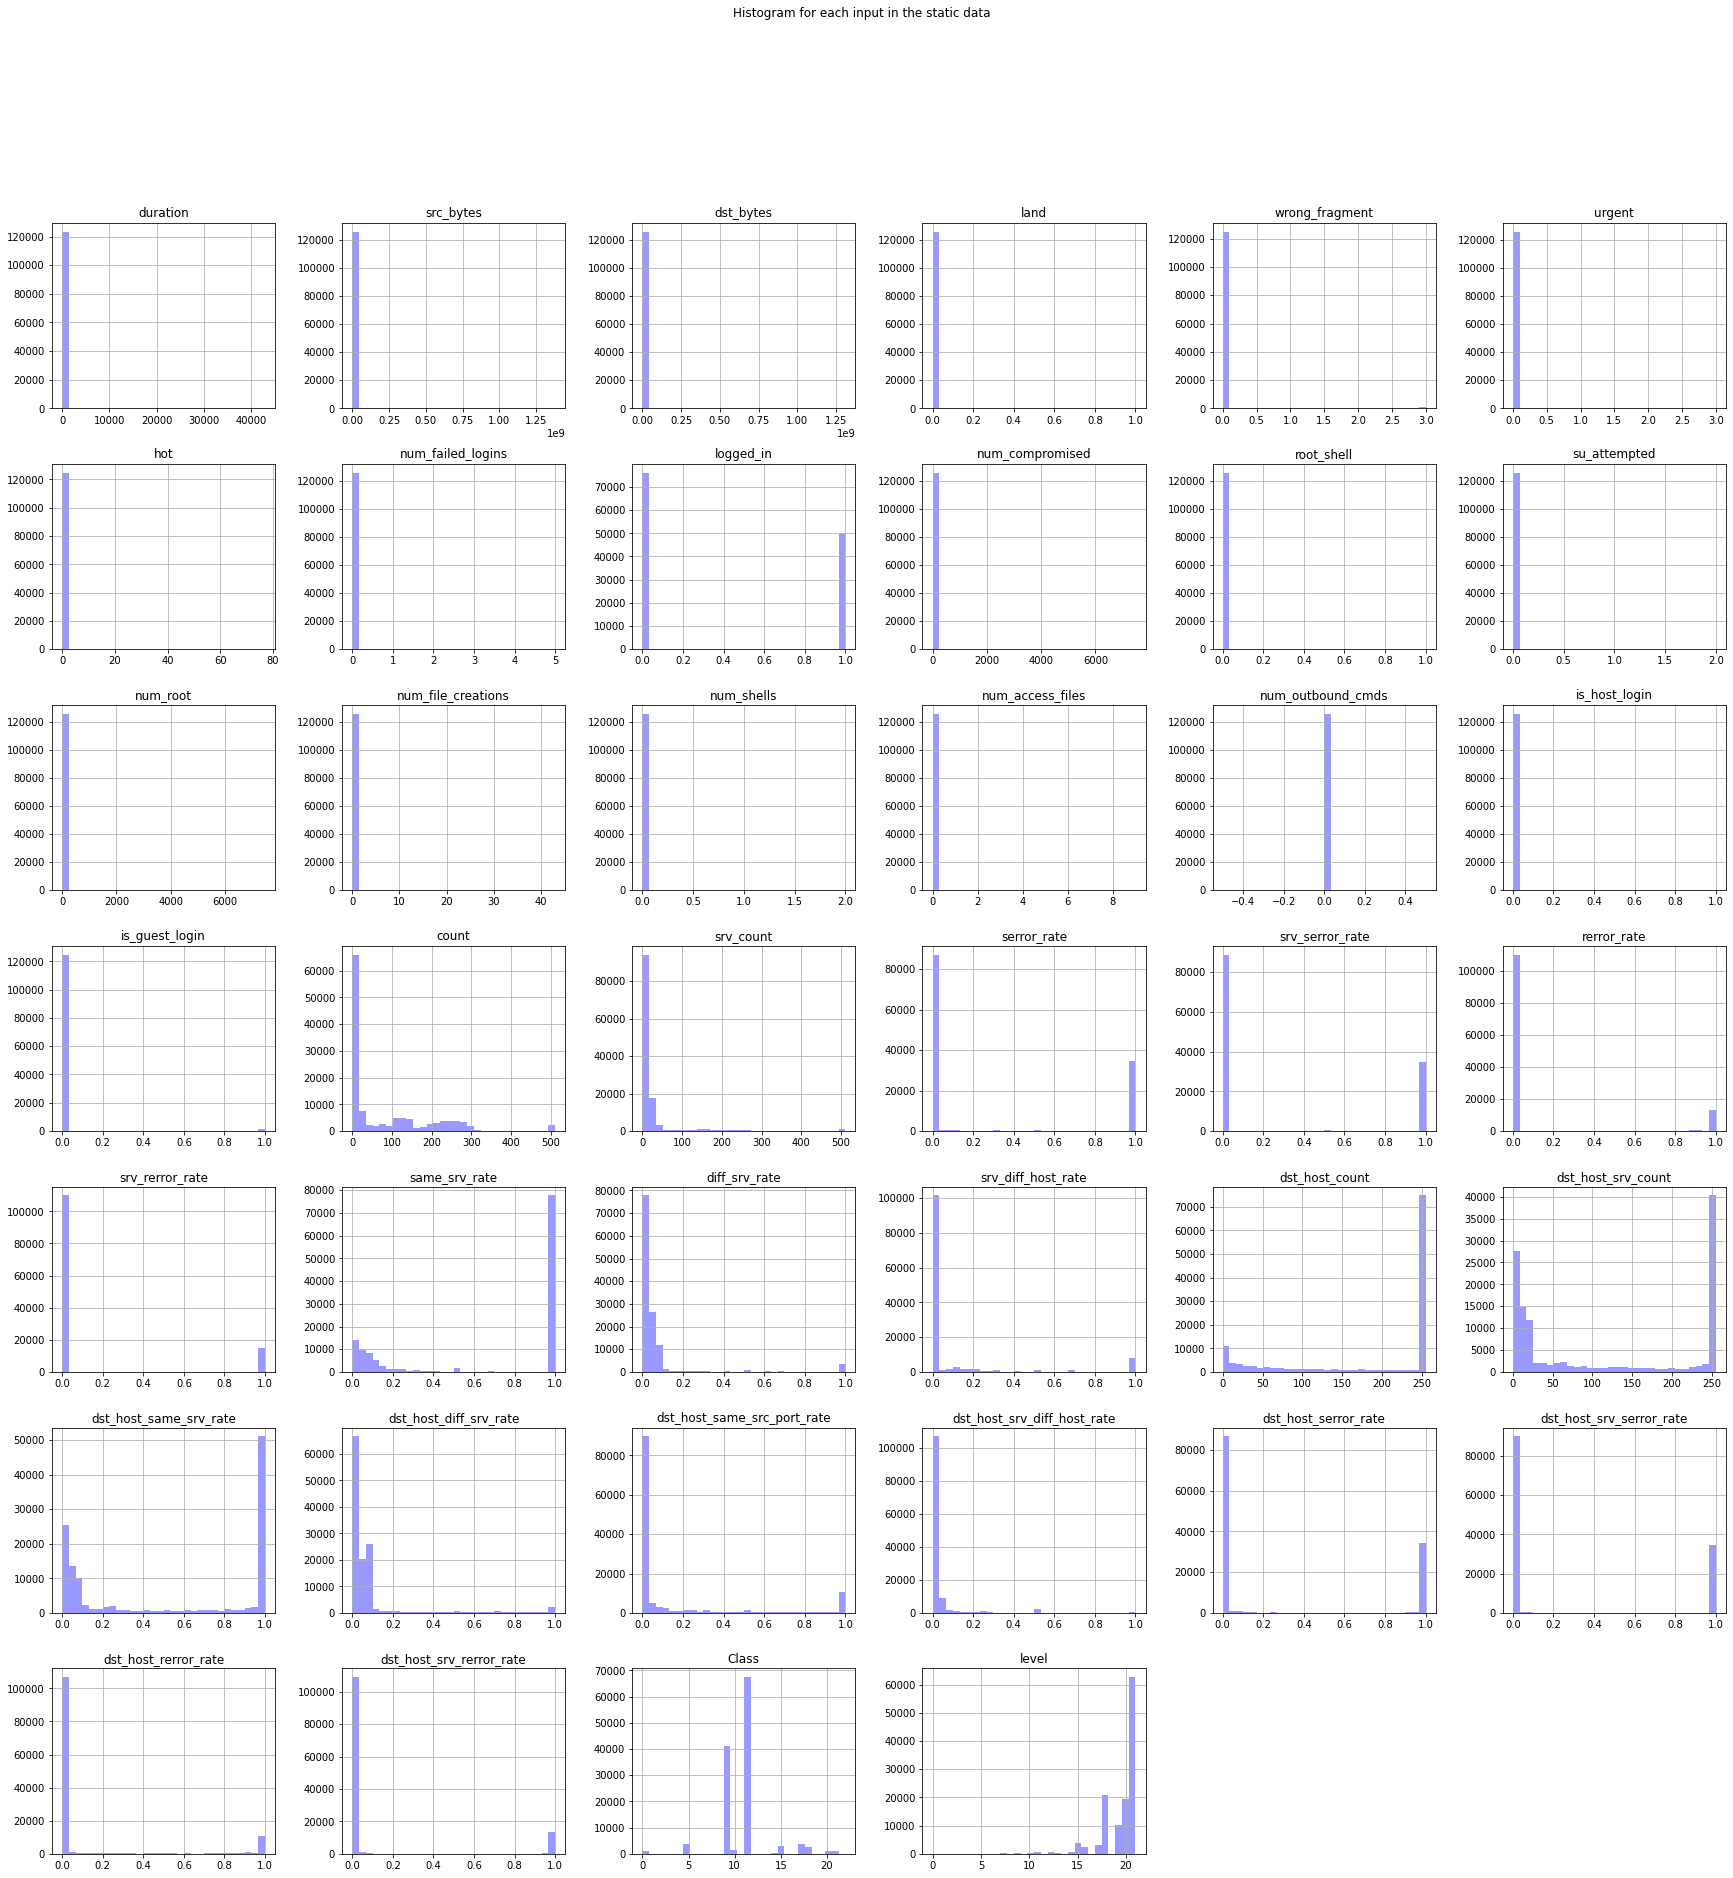

In [ ]:
# Create histograms for feature columns
nsl_dataset_train.hist(bins=30, figsize=(30, 30), color='blue', alpha=0.4)
plt.suptitle("Histogram for each input in the static data")
plt.show()

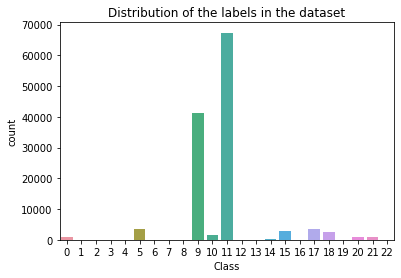

In [ ]:
ax = sns.countplot(x ='Class', data=nsl_dataset_train)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Distribution of the labels in the dataset')
plt.show()

In [ ]:
nsl_dataset_train['Class'].value_counts()

11    67343
9     41214
17     3633
5      3599
15     2931
18     2646
10     1493
0       956
20      892
21      890
14      201
3        53
1        30
22       20
6        18
4        11
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: Class, dtype: int64

In [ ]:
#LabelEncoder for the categorical data
p_le = preprocessing.LabelEncoder()
s_le = preprocessing.LabelEncoder()
f_le = preprocessing.LabelEncoder()

nsl_dataset_train['protocol_type'] = p_le.fit_transform(nsl_dataset_train['protocol_type'])
nsl_dataset_train['service'] = s_le.fit_transform(nsl_dataset_train['service'])
nsl_dataset_train['flag'] = f_le.fit_transform(nsl_dataset_train['flag'])

In [ ]:
nsl_X_train = nsl_dataset_train.drop(columns = ['Class'])
nsl_y_train = nsl_dataset_train['Class']

In [ ]:
# standard scaler
scaler = MinMaxScaler()

nsl_X_train_scaled = pd.DataFrame(scaler.fit_transform(nsl_X_train), columns = nsl_X_train.columns)


In [ ]:
#split the dataset into training, testing, and Validation datasets 70:20:10 with stratified label
X_train, X_test, y_train, y_test = train_test_split(nsl_X_train_scaled, nsl_y_train, train_size=0.8, random_state=42, stratify=nsl_y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, random_state=42, stratify=y_train)

In [ ]:
print('shape of the training dataset ', X_train.shape)
print('shape of the testing dataset ', X_test.shape)
print('shape of the validation dataset ', X_val.shape)

shape of the training dataset  (90700, 42)
shape of the testing dataset  (25195, 42)
shape of the validation dataset  (10078, 42)


## First, testing with all features on all models


In [ ]:
before_fs = []

### Mlp Classifier

**HyperParameters MLP** 

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(100,200),(100,)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05]
}

mlp_clf = MLPClassifier(random_state = 42, max_iter = 1000)
# Build the grid search
grid_MLP = GridSearchCV(estimator=mlp_clf, param_grid=parameter_space, cv = 5, n_jobs=-1, scoring='f1_weighted')
grid_results = grid_MLP.fit(X_val, y_val)

grid_results.best_params_, grid_results.best_score_

({'alpha': 0.0001, 'hidden_layer_sizes': (100, 200), 'solver': 'adam'},
 0.9944898041401528)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.75      0.50      0.60         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.99      0.97      0.98       720
           6       1.00      1.00      1.00         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.95      0.97      0.96       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        40
          15       1.00      0.99      1.00       586
          16       0.00      0.00      0.00         2
          17       0.99    

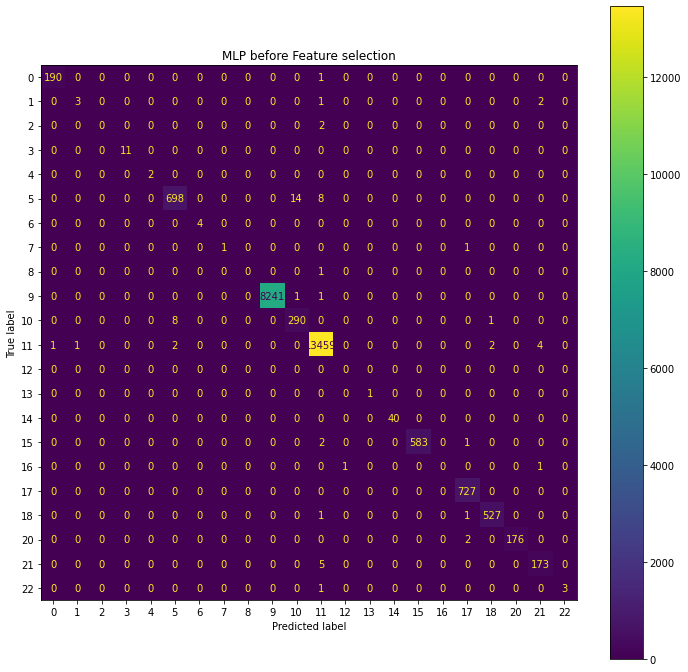

In [ ]:
# first the mlp classifier

mlp_clf = MLPClassifier(random_state = 42, max_iter = 1000, hidden_layer_sizes = (100, 200), alpha= 0.0001, solver='adam')

mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

print(classification_report(y_test, y_pred))

F1_mlp = f1_score(y_test, y_pred, average='weighted')
before_fs.append(['MLP', F1_mlp])

evaluate_model(mlp_clf, X_test, y_test, 'MLP before Feature selection')

### MultinomialNB

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.22      0.33      0.27         6
           2       0.00      0.00      0.00         2
           3       0.06      1.00      0.11        11
           4       0.00      0.00      0.00         2
           5       0.58      0.78      0.67       720
           6       0.80      1.00      0.89         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.98      0.84      0.90      8243
          10       0.00      0.00      0.00       299
          11       0.94      0.96      0.95     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.62      0.76      0.69       586
          16       0.00      0.00      0.00         2
          17       0.26      0.68      0.37       727
          18       1.00    

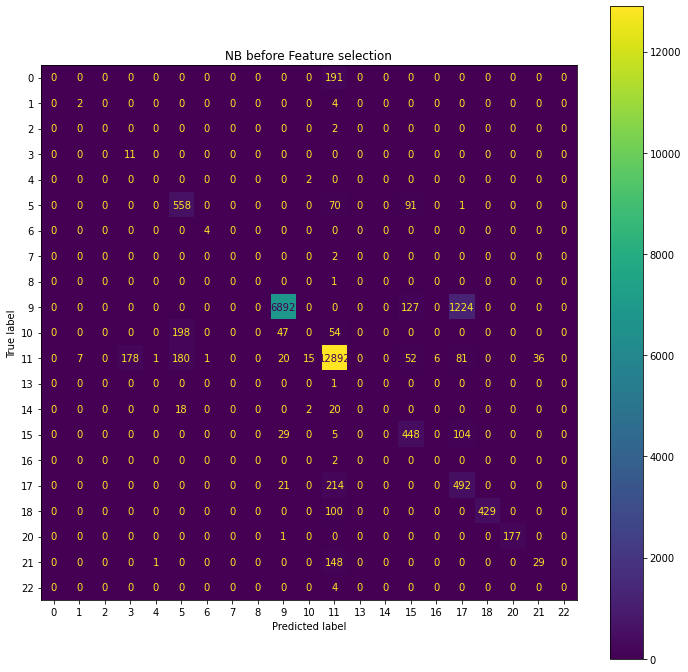

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

evaluate_model(nb_clf, X_test, y_test, 'NB before Feature selection')

F1_NB = f1_score(y_test, y_pred, average='weighted')

before_fs.append(['NB', F1_NB])


### SVM

**HyperParameters SVM**

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]}

svm_clf = SVC(random_state = 42)
# Build the grid search
grid_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv = 5, n_jobs=-1, scoring='f1_weighted')
grid_results = grid_svm.fit(X_val, y_val)

grid_results.best_params_, grid_results.best_score_

({'C': 100, 'gamma': 1}, 0.9945091276133071)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         2
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         2
           5       0.98      1.00      0.99       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.97      0.98       299
          11       1.00      1.00      1.00     13469
          13       0.00      0.00      0.00         1
          14       1.00      0.97      0.99        40
          15       1.00      0.99      1.00       586
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00       727
          18       1.00    

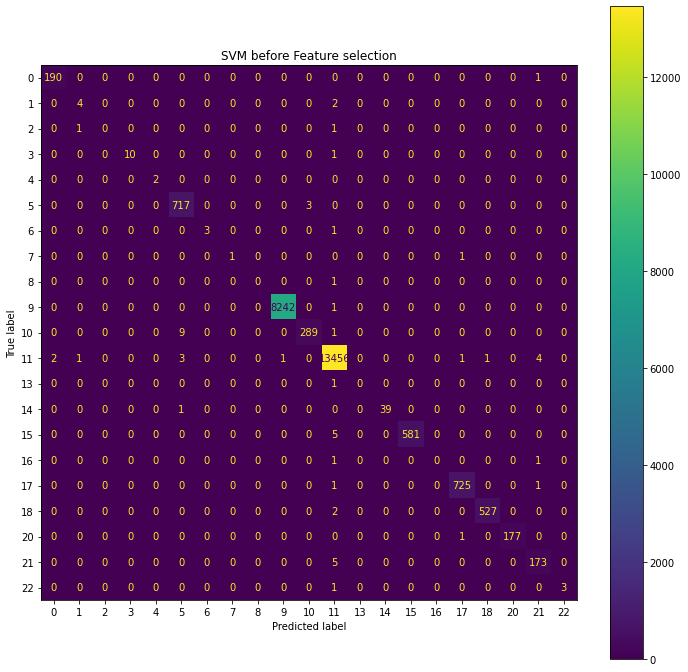

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42, C=100, gamma=1)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

F1_SVM = f1_score(y_test, y_pred, average='weighted')

before_fs.append(['SVM', F1_SVM])

evaluate_model(svm_clf, X_test, y_test, 'SVM before Feature selection')


### Random Forest

**HyperParameters tuning for Random Forest**

In [ ]:
#using GridSearchCV to find the suitable number of estimators and max depth in our problem by fiting the validation data and using cross validation = 5

n_estimators = [64, 100, 128, 200]
max_depth = [2, 4, 6, 8, 10, None]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

# Build the grid search
rf_grid = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
grid = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv = 5, n_jobs=-1, scoring='f1_weighted')
grid_results = grid.fit(X_val, y_val)

grid_results.best_params_, grid_results.best_score_

({'max_depth': None, 'n_estimators': 128}, 0.9956255436074682)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      0.83      0.91         6
           2       0.00      0.00      0.00         2
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         2
           5       0.98      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.98      0.97      0.97       299
          11       1.00      1.00      1.00     13469
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        40
          15       1.00      1.00      1.00       586
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00       727
          18       1.00    

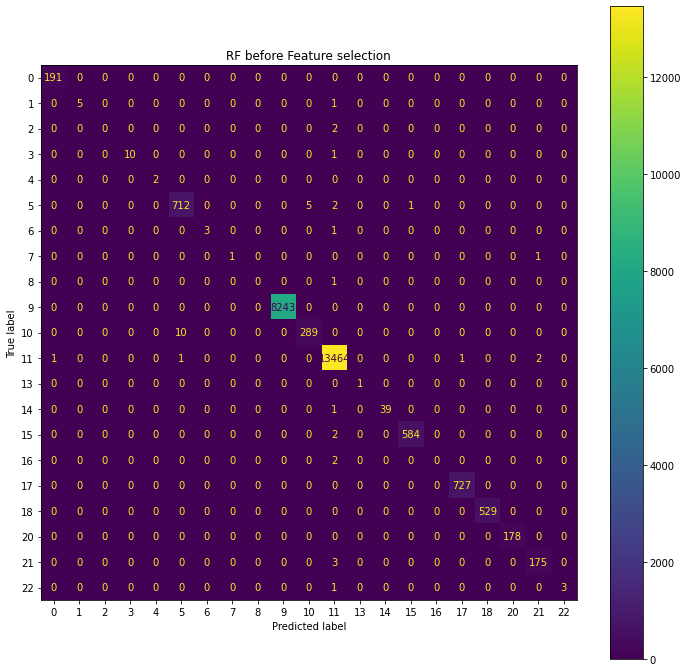

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42, n_estimators=128, max_depth=None)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))

F1_RF = f1_score(y_test, y_pred, average='weighted')

before_fs.append(['RF', F1_RF])

evaluate_model(rf_clf, X_test, y_test, 'RF before Feature selection')


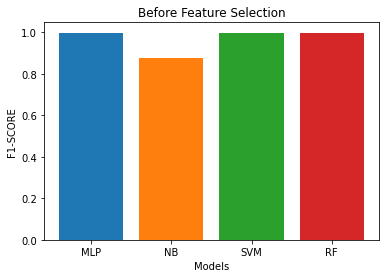

In [ ]:
plotModels(before_fs, 'Before Feature Selection', 'Models', 'F1-SCORE')

## Feature Selection using Genetic Algorithm

In [ ]:
def get_fitness(individual, X_train, y_train, X_test, y_test):
    rg = RandomForestClassifier(random_state=42)
    columns = [column for (column, binary_value) in zip(X_train.columns, individual) if binary_value]
    training_set = X_train[columns]
    test_set = X_test[columns]
    rg.fit(training_set, y_train)
    preds = rg.predict(test_set)
    return 100 / np.sqrt(mean_squared_error(y_test, preds))

In [ ]:
# baseline fitness score
individual = [1] * 42
print(get_fitness(individual, X_train, y_train, X_test, y_test))

# random fitness scores
random_individual = [random.randint(0, 1) for i in range(42)]
print(get_fitness(random_individual, X_train, y_train, X_test, y_test))

352.81896958134587
261.72868243328884


### Genetic Operators
Each iteration, we'll have a population of 20 individuals, based on which the next generation will be formed through the genetic operators as follows:

- Elitism: The fittest candidate will continue on to the next generation
- Randomness: One candidate will be selected completely randomly
- Tournaments: There will be 9 tournaments of 5 randomly selected individuals. In each tournament, two individuals will be chosen (with likelihood of being choosen proportionate to their fitness) for crossover. The crossover will split them at a random spot and combine them.
- Mutation: Finally, once the new population is formed, each individual will have a very small chance (1 in a thousand) of suffering mutation (having one random bit flipped).

In [ ]:
def crossover(individual_a, individual_b, num_of_features):
    crossing_point = random.randint(0, num_of_features - 1)
    offspring_a = individual_a[0:crossing_point] + individual_b[crossing_point:num_of_features]
    offspring_b = individual_b[0:crossing_point] + individual_a[crossing_point:num_of_features]
    return offspring_a, offspring_b

def tournament(current_population, num_of_features):
    index = sorted(random.sample(range(0, 20), 5))             # choose first 10 features
    tournament_members  = [current_population[i] for i in index]
    total_fitness = sum([individual[1] for individual in tournament_members])
    probabilities = [individual[1] / total_fitness for individual in tournament_members]
    index_a, index_b = np.random.choice(5, size=2, p=probabilities)
    return crossover(tournament_members[index_a][0], tournament_members[index_b][0], num_of_features)

def mutation(individual, num_of_features):
    mutation_point = random.randint(0, num_of_features - 1)
    if(individual[mutation_point]):
        individual[mutation_point] = 0
    else:
        individual[mutation_point] = 1

def build_next_generation(current_population, mutation_rate, num_of_features):
    next_generation = []
    next_generation.append(current_population[0][0]) # elitism
    next_generation.append(current_population[random.randint(1,19)][0]) # randomness
    
    for i in range(9): # tournaments
        offspring_a, offspring_b = tournament(current_population, num_of_features)
        next_generation.append(offspring_a)
        next_generation.append(offspring_b)
    
    for individual in next_generation: # mutation
        if(random.randint(1,mutation_rate) == 1):
            mutation(individual, num_of_features)
    return next_generation

In [ ]:
def run_ga(current_population, num_of_generations, num_of_features, X_train, y_train, X_test, y_test, mutation_rate=1000):
    fittest_individuals = []
    for i in range(num_of_generations):
        current_population = get_population_fitness(current_population, X_train, y_train, X_test, y_test) # get pop fitness
        fittest_individuals.append(current_population[0]) # record fittest individual (for graphing and analysis)
        current_population = build_next_generation(current_population, mutation_rate, num_of_features) # make new population
    return fittest_individuals

In [ ]:
initial_population = [[random.randint(0, 1) for i in range(42)] for i in range(20)]

In [ ]:
fittest = run_ga(initial_population, 20, num_of_features = 42,
                 X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, mutation_rate = 10)   # using default mutation which is one in each thousand

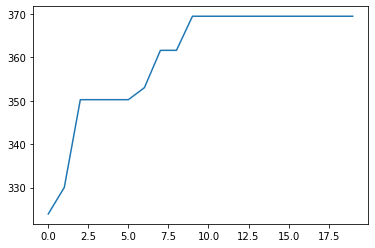

In [ ]:
%matplotlib inline
fitness = [ind[1] for ind in fittest]
sns.lineplot(y=fitness, x=range(20))

In [ ]:
for item in fittest[:-1]:
    if item[1] == max(fitness):
        top_performer = item
        break

In [ ]:
print("Total features included: " + str(top_performer[0].count(1)))

Total features included: 26


In [ ]:
included_columns = [column for (column, binary_value) in zip(nsl_X_train.columns, top_performer[0]) if binary_value]
excluded_columns = [column for (column, binary_value) in zip(nsl_X_train.columns, top_performer[0]) if not binary_value]

In [ ]:
def get_population_fitness(population, X_train, y_train, X_test, y_test):
    return sorted([(individual, get_fitness(individual, X_train, y_train, X_test, y_test)) for individual in population], key=lambda tup: tup[1], reverse=True)

In [ ]:
excluded_columns

['duration',
 'protocol_type',
 'flag',
 'land',
 'urgent',
 'num_failed_logins',
 'root_shell',
 'num_access_files',
 'is_host_login',
 'count',
 'srv_count',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_serror_rate']

In [ ]:
included_columns

['service',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_outbound_cmds',
 'is_guest_login',
 'serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

### Checking the chosen features

#### Testing the selected features on the models

### Now, testing after applying feature selection

In [ ]:
new_X_train = nsl_X_train_scaled[included_columns]
new_X_test = nsl_X_test_scaled[included_columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nsl_X_train_scaled, nsl_y_train, train_size=0.8, random_state=42)

In [ ]:
# first the mlp classifier

mlp_clf = MLPClassifier(random_state = 42, max_iter = 1000)

mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       1.00      0.33      0.50         9
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00         1
           5       0.98      1.00      0.99       733
           6       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.98      0.97      0.98       313
          11       1.00      1.00      1.00     13422
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      1.00      1.00       573
          16       0.00      0.00      0.00         1
          17       0.99      0.99      0.99       738
          18       0.99      1.00      0.99       534
          19       0.00    

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.17      0.11      0.13         9
           3       0.05      0.82      0.09        11
           4       0.00      0.00      0.00         1
           5       0.59      0.78      0.67       733
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         0
           9       0.98      0.83      0.90      8228
          10       0.10      0.01      0.01       313
          11       0.94      0.95      0.95     13422
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        43
          15       0.63      0.79      0.70       573
          16       0.00      0.00      0.00         1
          17       0.25      0.65      0.37       738
          18       1.00      0.82      0.90       534
          19       0.00    

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       0.67      0.22      0.33         9
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00         1
           5       0.95      0.99      0.97       733
           6       0.67      0.67      0.67         3
           9       1.00      1.00      1.00      8228
          10       0.93      0.95      0.94       313
          11       1.00      0.99      1.00     13422
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       0.99      0.99      0.99       573
          16       0.00      0.00      0.00         1
          17       0.97      0.98      0.98       738
          18       0.98      1.00      0.99       534
          19       0.00      0.00      0.00         1
          20       1.00    

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      0.33      0.50         9
           2       0.00      0.00      0.00         0
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00         1
           5       0.99      0.99      0.99       733
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.97      0.97      0.97       313
          11       1.00      1.00      1.00     13422
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      0.99      1.00       573
          16       0.00      0.00      0.00         1
          17       1.00      0.99      0.99       738
          18       1.00    

## Feature Selection using Entropy

In [ ]:
#Function to return entropy score of each features
def get_entropy(df_train):
  feature_names = (df_train.columns)
  features_entropy = []
  for feature in feature_names:

    try: feat = df_train.loc[df_train["class"] == 1, feature]
    except: feat = df_train.loc[df_train["Class"] == 1, feature]
    probs = feat.value_counts(normalize=True) #get probability of each feature given anomaly
    entropy = -1 * np.sum(np.log2(probs) * probs) #get entropy of each feature
    features_entropy.append(entropy)
  df_entropy = pd.DataFrame({"feature":feature_names, "entropy":features_entropy})
  df_entropy_sorted = df_entropy.sort_values(['entropy'], ascending=False)
  return df_entropy_sorted

In [ ]:
df_entropy_multiclass = get_entropy(nsl_dataset_train)
print(df_entropy_multiclass)

                        feature   entropy
5                     dst_bytes  4.773557
0                      duration  4.040224
4                     src_bytes  3.440224
32           dst_host_srv_count  3.279799
42                        level  2.705587
31               dst_host_count  2.682589
35  dst_host_same_src_port_rate  2.256565
12              num_compromised  2.034197
9                           hot  1.820112
22                        count  1.407105
16           num_file_creations  1.255537
36  dst_host_srv_diff_host_rate  1.172160
40     dst_host_srv_rerror_rate  1.037010
39         dst_host_rerror_rate  1.037010
2                       service  1.032268
13                   root_shell  0.970951
23                    srv_count  0.905587
29                diff_srv_rate  0.627492
28                same_srv_rate  0.560825
15                     num_root  0.420026
26                  rerror_rate  0.420026
24                  serror_rate  0.353359
27              srv_rerror_rate  0

In [ ]:
#return only features with entropy greater than a threshold
selected_features_df = df_entropy_multiclass.loc[df_entropy_multiclass['entropy'] > 0.3]
selected_features_df

,feature,entropy
5,dst_bytes,4.773557
0,duration,4.040224
4,src_bytes,3.440224
32,dst_host_srv_count,3.279799
42,level,2.705587
31,dst_host_count,2.682589
35,dst_host_same_src_port_rate,2.256565
12,num_compromised,2.034197
9,hot,1.820112
22,count,1.407105


In [ ]:
#Use the selected extracted features
selected_features = selected_features_df["feature"].tolist()
X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

### Now, testing after applying feature selection

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.50      0.50      0.50         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       0.67      1.00      0.80         2
           5       0.99      0.95      0.97       720
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         2
           8       0.25      1.00      0.40         1
           9       1.00      1.00      1.00      8243
          10       0.95      0.98      0.96       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       0.73      0.93      0.81        40
          15       1.00      0.99      1.00       586
          16       0.00      0.00      0.00         2
          17       0.99    

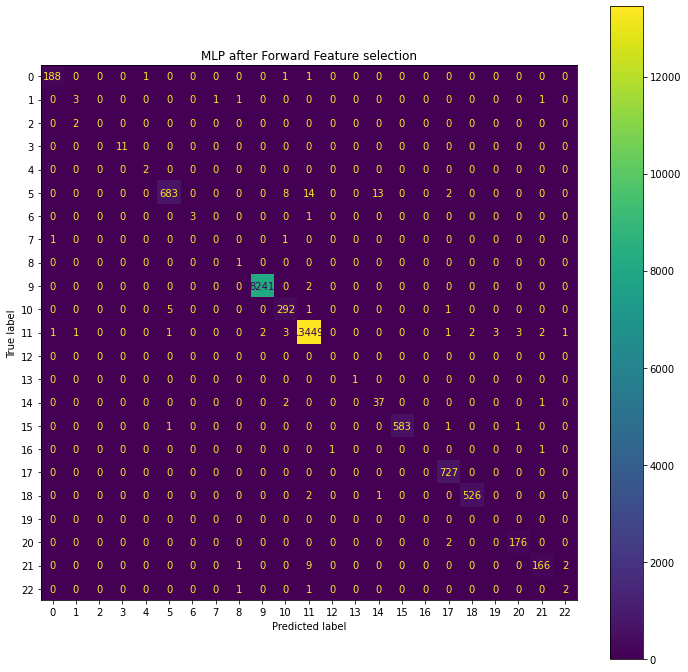

In [ ]:
# first the mlp classifier
after_fors=[]
mlp_clf = MLPClassifier(random_state = 42, max_iter = 1000, hidden_layer_sizes = (100, 200), alpha= 0.0001, solver='adam')

mlp_clf.fit(X_train_fs, y_train)

y_pred = mlp_clf.predict(X_test_fs)

print(classification_report(y_test, y_pred))

F1_mlp = f1_score(y_test, y_pred, average='weighted')
after_fors.append(['MLP', F1_mlp])

evaluate_model(mlp_clf, X_test_fs, y_test, 'MLP after Forward Feature selection')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.75      0.50      0.60         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2
           5       0.77      0.43      0.56       720
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.98      1.00      0.99      8243
          10       0.43      0.03      0.06       299
          11       0.89      0.98      0.93     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.71      0.71      0.71       586
          16       0.00      0.00      0.00         2
          17       0.73      0.58      0.65       727
          18       0.94    

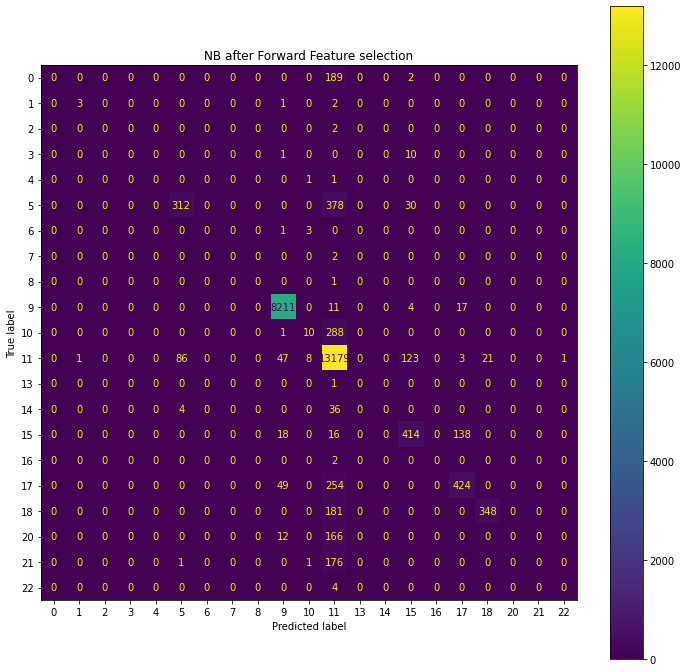

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(X_train_fs, y_train)

y_pred = nb_clf.predict(X_test_fs)

print(classification_report(y_test, y_pred))

evaluate_model(nb_clf, X_test_fs, y_test, 'NB after Forward Feature selection')

F1_NB = f1_score(y_test, y_pred, average='weighted')

after_fors.append(['NB', F1_NB])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.80      0.67      0.73         6
           2       0.00      0.00      0.00         2
           3       0.92      1.00      0.96        11
           4       0.67      1.00      0.80         2
           5       0.98      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.96      0.98      0.97       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       0.92      0.85      0.88        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       1.00    

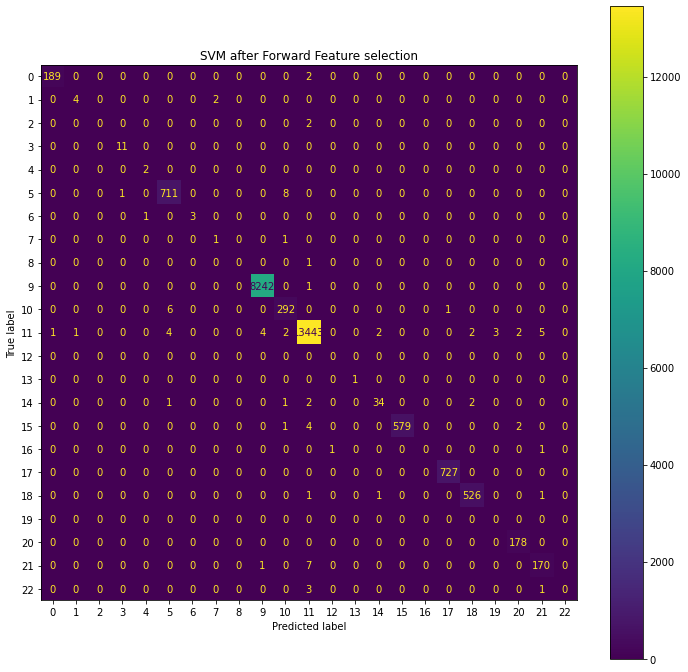

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42, C=100, gamma=1)

svm_clf.fit(X_train_fs, y_train)

y_pred = svm_clf.predict(X_test_fs)

print(classification_report(y_test, y_pred))

F1_SVM = f1_score(y_test, y_pred, average='weighted')

after_fors.append(['SVM', F1_SVM])

evaluate_model(svm_clf, X_test_fs, y_test, 'SVM after Forward Feature selection')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.98      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.98      0.96      0.97       299
          11       1.00      1.00      1.00     13469
          13       1.00      1.00      1.00         1
          14       1.00      0.95      0.97        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       0.99      1.00      1.00       727
          18       1.00    

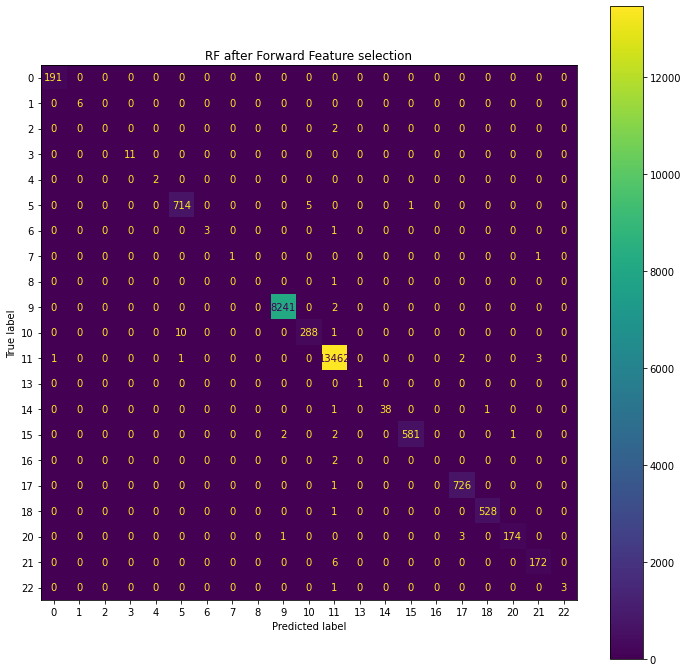

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42, n_estimators=128, max_depth=None)

rf_clf.fit(X_train_fs, y_train)

y_pred = rf_clf.predict(X_test_fs)

print(classification_report(y_test, y_pred))

F1_RF = f1_score(y_test, y_pred, average='weighted')

after_fors.append(['RF', F1_RF])

evaluate_model(rf_clf, X_test_fs, y_test, 'RF after Forward Feature selection')

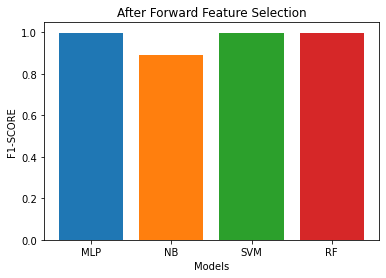

In [ ]:
plotModels(after_fors, 'After Forward Feature Selection', 'Models', 'F1-SCORE')

In [ ]:
after_fors

[['MLP', 0.9959226682038784],
 ['NB', 0.8890585205399554],
 ['SVM', 0.9966521425823447],
 ['RF', 0.9977801292552998]]

## Feature Selection using Forward Model Selection

In [ ]:
clfd = RandomForestClassifier(random_state=42)
sfs = SequentialFeatureSelector(clfd,
          n_features_to_select=20,
          direction='forward',
          n_jobs=-1,
          scoring='f1_weighted',
          cv=5)
# Build step forward feature selection
sfs1 = sfs.fit(X_train, y_train)
s=[]
k=sfs.get_support()
for j in range(len(k)):
    if k[j]==True:
      s.append(X_train.columns[j])
print(s)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'logged_in', 'num_compromised', 'su_attempted', 'num_file_creations', 'num_shells', 'srv_count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'level']


In [ ]:
s=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'logged_in', 'num_compromised', 'su_attempted', 'num_file_creations', 'num_shells', 'srv_count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'level']


### Now, testing after applying feature selection

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       1.00      0.50      0.67         6
           2       0.00      0.00      0.00         2
           3       0.83      0.91      0.87        11
           4       1.00      1.00      1.00         2
           5       0.98      0.98      0.98       720
           6       1.00      0.75      0.86         4
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.96      0.97      0.96       299
          11       1.00      1.00      1.00     13469
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        40
          15       0.99      1.00      0.99       586
          16       1.00      0.50      0.67         2
          17       1.00      0.99      1.00       727
          18       1.00    

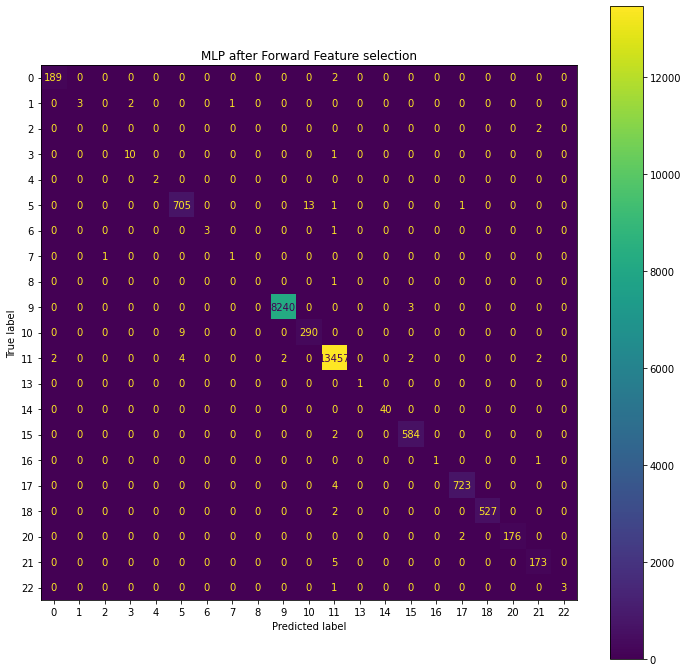

In [ ]:
# first the mlp classifier
after_fors=[]
mlp_clf = MLPClassifier(random_state = 42, max_iter = 1000, hidden_layer_sizes = (100, 200), alpha= 0.0001, solver='adam')

mlp_clf.fit(X_train[s], y_train)

y_pred = mlp_clf.predict(X_test[s])

print(classification_report(y_test, y_pred))

F1_mlp = f1_score(y_test, y_pred, average='weighted')
after_fors.append(['MLP', F1_mlp])

evaluate_model(mlp_clf, X_test[s], y_test, 'MLP after Forward Feature selection')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2
           5       0.74      0.91      0.81       720
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.98      0.96      0.97      8243
          10       0.82      0.15      0.25       299
          11       0.90      0.98      0.94     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.78      0.49      0.60       586
          16       0.00      0.00      0.00         2
          17       0.76      0.57      0.66       727
          18       1.00    

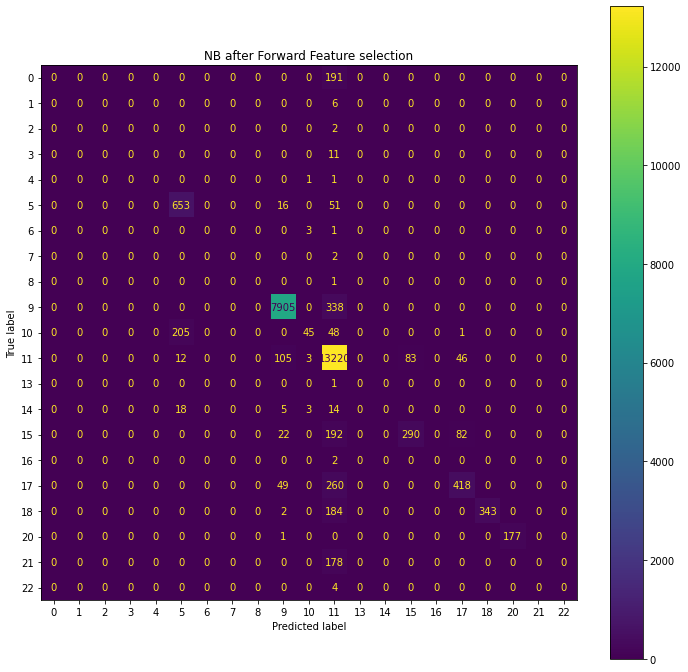

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(X_train[s], y_train)

y_pred = nb_clf.predict(X_test[s])

print(classification_report(y_test, y_pred))

evaluate_model(nb_clf, X_test[s], y_test, 'NB after Forward Feature selection')

F1_NB = f1_score(y_test, y_pred, average='weighted')

after_fors.append(['NB', F1_NB])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       1.00      0.67      0.80         6
           2       0.00      0.00      0.00         2
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         2
           5       0.96      0.99      0.97       720
           6       1.00      0.75      0.86         4
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.91      0.95       299
          11       1.00      1.00      1.00     13469
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       0.99      0.99      0.99       727
          18       1.00    

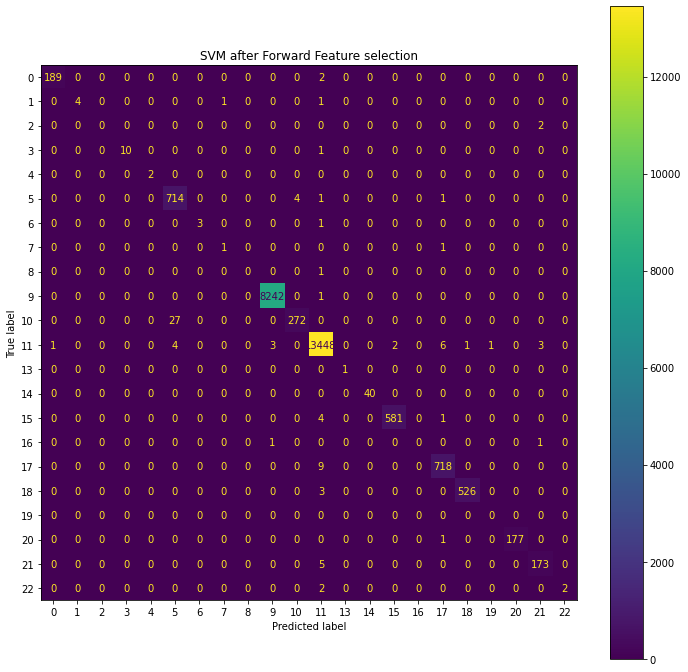

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42, C=100, gamma=1)

svm_clf.fit(X_train[s], y_train)

y_pred = svm_clf.predict(X_test[s])

print(classification_report(y_test, y_pred))

F1_SVM = f1_score(y_test, y_pred, average='weighted')

after_fors.append(['SVM', F1_SVM])

evaluate_model(svm_clf, X_test[s], y_test, 'SVM after Forward Feature selection')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         2
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         2
           5       0.99      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.97      0.98       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        40
          15       1.00      1.00      1.00       586
          16       0.00      0.00      0.00         2
          17       1.00    

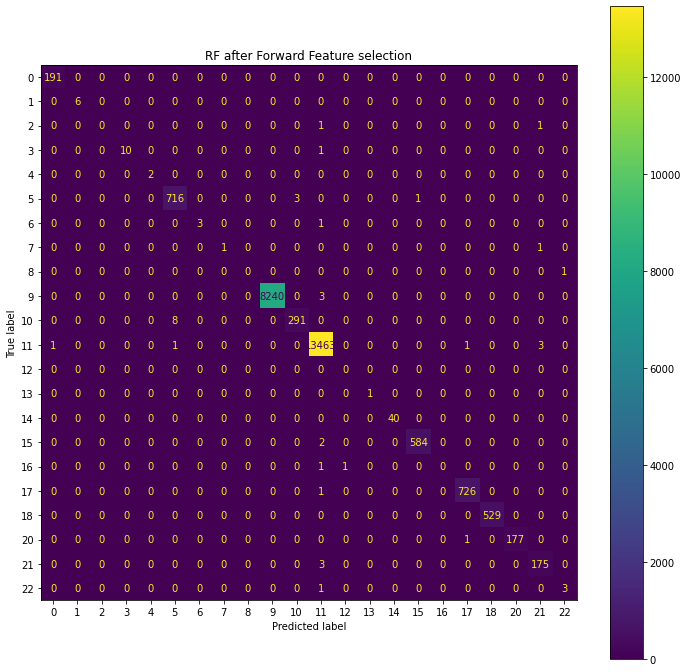

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42, n_estimators=128, max_depth=None)

rf_clf.fit(X_train[s], y_train)

y_pred = rf_clf.predict(X_test[s])

print(classification_report(y_test, y_pred))

F1_RF = f1_score(y_test, y_pred, average='weighted')

after_fors.append(['RF', F1_RF])

evaluate_model(rf_clf, X_test[s], y_test, 'RF after Forward Feature selection')

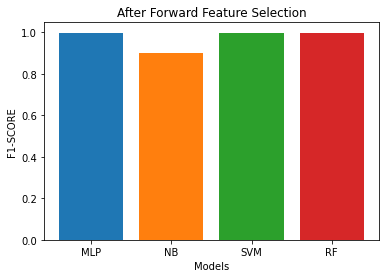

In [ ]:
plotModels(after_fors, 'After Forward Feature Selection', 'Models', 'F1-SCORE')

In [ ]:
print('The F1 score for all models after forward selection:')
after_fors

The F1 score for all models after forward selection:


[['MLP', 0.997273780277307],
 ['NB', 0.9008450474606197],
 ['SVM', 0.9962326275566176],
 ['RF', 0.9984417107158003]]

## Feature Selection using Embedded Methods

In [ ]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LassoCV

rfe = RFECV(estimator=LassoCV(), cv=5, n_jobs=-1)
# fit the model
fitted_model = rfe.fit(X_train, y_train)

In [ ]:
print('Optimal number of features: {}'.format(fitted_model.n_features_))

Optimal number of features: 29


In [ ]:
dataframe = []
rfe_selected_features = []
for i in range(nsl_X_train_scaled.shape[1]):
  if(fitted_model.support_[i] == True):
    dataframe.append([nsl_X_train.columns[i], fitted_model.ranking_[i], fitted_model.support_[i]])
    rfe_selected_features.append(nsl_X_train.columns[i])

pd.DataFrame(dataframe, columns=['Feature', 'ranking', 'selected'])

,Feature,ranking,selected
0,duration,1,True
1,protocol_type,1,True
2,service,1,True
3,flag,1,True
4,wrong_fragment,1,True
5,hot,1,True
6,num_failed_logins,1,True
7,logged_in,1,True
8,root_shell,1,True
9,is_guest_login,1,True


In [ ]:
rfe_selected_features

['duration',
 'protocol_type',
 'service',
 'flag',
 'wrong_fragment',
 'hot',
 'num_failed_logins',
 'logged_in',
 'root_shell',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

### Now, testing after applying feature selection

In [ ]:
rfe_features = []
new_X_train = X_train[rfe_selected_features]
print('new shape', new_X_train.shape)
new_X_test = X_test[rfe_selected_features]

new shape (90700, 29)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.98      1.00      0.99       720
           6       1.00      1.00      1.00         4
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.96      0.97       299
          11       1.00      1.00      1.00     13469
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00       727
          18       1.00    

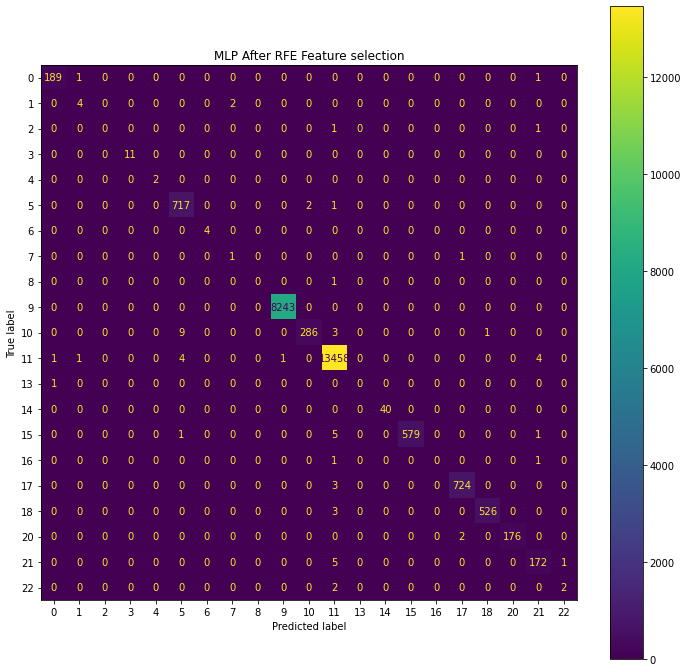

In [ ]:
# first the mlp classifier

mlp_clf = MLPClassifier(random_state = 42, max_iter = 1000, hidden_layer_sizes = (100, 200), alpha= 0.0001, solver='adam')

mlp_clf.fit(new_X_train, y_train)

y_pred = mlp_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_mlp = f1_score(y_test, y_pred, average='weighted')
rfe_features.append(['MLP', F1_mlp])

evaluate_model(mlp_clf, new_X_test, y_test, 'MLP After RFE Feature selection')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       1.00      0.50      0.67         6
           2       0.00      0.00      0.00         2
           3       0.04      0.91      0.07        11
           4       0.00      0.00      0.00         2
           5       0.60      0.78      0.68       720
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.99      0.84      0.91      8243
          10       0.67      0.10      0.18       299
          11       0.94      0.96      0.95     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.65      0.76      0.70       586
          16       0.00      0.00      0.00         2
          17       0.25      0.67      0.37       727
          18       1.00    

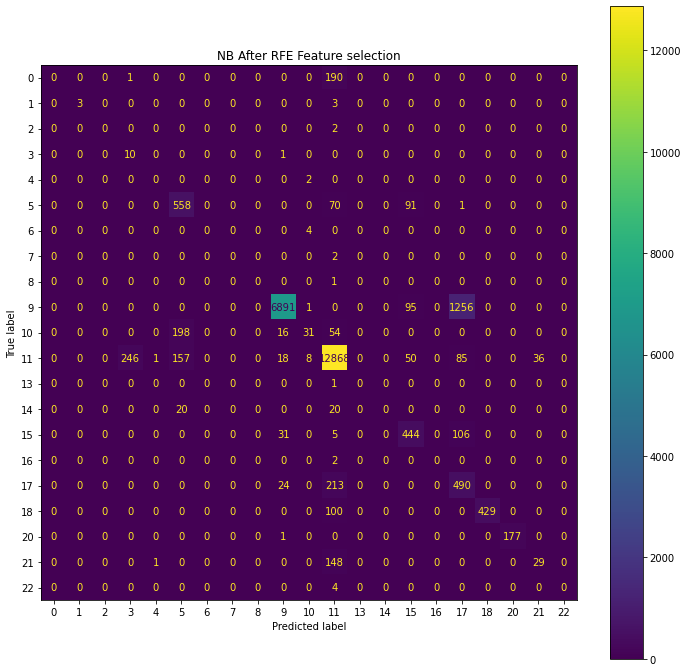

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(new_X_train, y_train)

y_pred = nb_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

evaluate_model(nb_clf, new_X_test, y_test, 'NB After RFE Feature selection')

F1_NB = f1_score(y_test, y_pred, average='weighted')

rfe_features.append(['NB', F1_NB])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.60      0.50      0.55         6
           2       0.00      0.00      0.00         2
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         2
           5       0.98      1.00      0.99       720
           6       1.00      1.00      1.00         4
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.97      0.98       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       1.00      0.97      0.99        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       1.00    

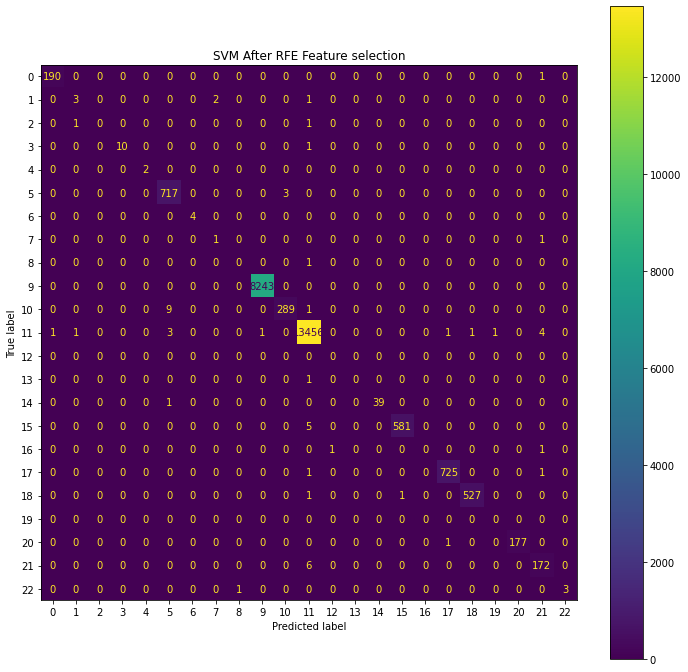

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42, C=100, gamma=1)

svm_clf.fit(new_X_train, y_train)

y_pred = svm_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_SVM = f1_score(y_test, y_pred, average='weighted')

rfe_features.append(['SVM', F1_SVM])

evaluate_model(svm_clf, new_X_test, y_test, 'SVM After RFE Feature selection')


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       0.57      0.67      0.62         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.98      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.97      0.98       299
          11       1.00      1.00      1.00     13469
          13       0.00      0.00      0.00         1
          14       1.00      0.97      0.99        40
          15       1.00      0.99      1.00       586
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00       727
          18       1.00    

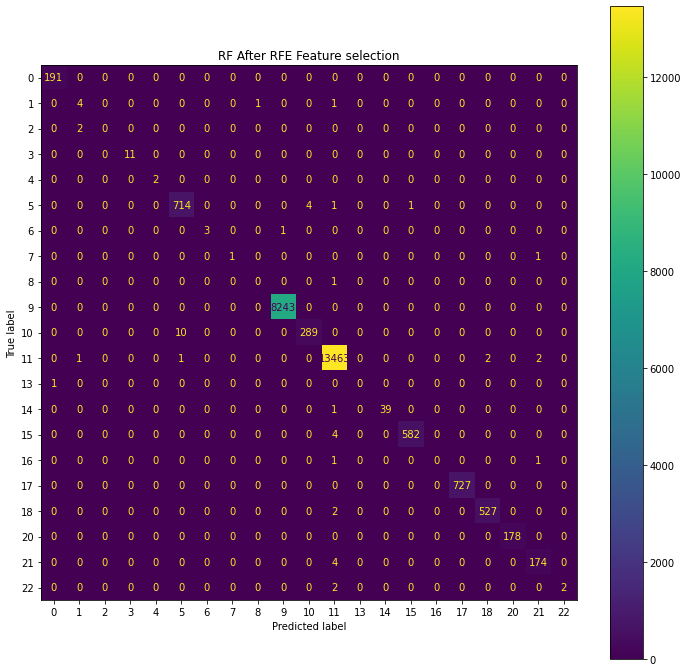

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42, n_estimators=128, max_depth=None)

rf_clf.fit(new_X_train, y_train)

y_pred = rf_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_RF = f1_score(y_test, y_pred, average='weighted')

rfe_features.append(['RF', F1_RF])

evaluate_model(rf_clf, new_X_test, y_test, 'RF After RFE Feature selection')


In [ ]:
rfe_features

[['MLP', 0.9974609099522819],
 ['NB', 0.8789486955386143],
 ['SVM', 0.9977169653584139],
 ['RF', 0.9980977428040264]]

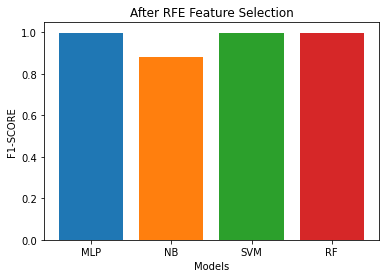

In [ ]:
plotModels(rfe_features, 'After RFE Feature Selection', 'Models', 'F1-SCORE')

## New Ensemble Feature selection

In [5]:
def ensemble_method(no_features, s1, s2, s3):
  s11=set(s1)
  s22=set(s2)
  s33=set(s3)

  set1 = s11.intersection(s22) 
  set2 = set1.intersection(s33)


  # Converts resulting set to list
  feature=list(set2)
  
  while len(feature) <= no_features:
    for item in set1:
      if item not in feature:
            feature.append(item)
      
    for item in s11.intersection(s33):
      if item not in feature:
        feature.append(item)
    
    for item in s22.intersection(s33):
      if item not in feature:
        feature.append(item)

  print(feature)
  print(len(feature))
  
  return feature

In [6]:
s1=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'logged_in', 'num_compromised', 'su_attempted', 'num_file_creations', 'num_shells', 'srv_count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'level']
s2=['dst_bytes',
 'duration',
 'src_bytes',
 'dst_host_srv_count',
 'level',
 'dst_host_count',
 'dst_host_same_src_port_rate',
 'num_compromised',
 'hot',
 'count',
 'num_file_creations',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'service',
 'root_shell',
 'srv_count',
 'diff_srv_rate',
 'same_srv_rate',
 'num_root',
 'rerror_rate',
 'serror_rate']
s3=['duration',
 'protocol_type',
 'service',
 'flag',
 'wrong_fragment',
 'hot',
 'num_failed_logins',
 'logged_in',
 'root_shell',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

feature = ensemble_method(26, s1, s2, s3)


KeyboardInterrupt: ignored

In [4]:
s1=['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'logged_in', 'num_compromised', 'su_attempted', 'num_file_creations', 'num_shells', 'srv_count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'level']
s2=['dst_bytes',
 'duration',
 'src_bytes',
 'dst_host_srv_count',
 'level',
 'dst_host_count',
 'dst_host_same_src_port_rate',
 'num_compromised',
 'hot',
 'count',
 'num_file_creations',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'service',
 'root_shell',
 'srv_count',
 'diff_srv_rate',
 'same_srv_rate',
 'num_root',
 'rerror_rate',
 'serror_rate']
s3=['duration',
 'protocol_type',
 'service',
 'flag',
 'wrong_fragment',
 'hot',
 'num_failed_logins',
 'logged_in',
 'root_shell',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']
min=1000
if len(s1) < min:
    min=len(s1)
if len(s2) < min:
    min=len(s2)
if len(s3) < min:
    min=len(s3)
    
    
s11=set(s1)
s22=set(s2)
s33=set(s3)
# s44=set(s4)
set1 = s11.intersection(s22) 
set2 = set1.intersection(s33)


    # Converts resulting set to list
feature=list(set2)



set1 = s11.intersection(s22)
for item in set1:
    if item not in feature:
        feature.append(item)

set1 = s11.intersection(s33)
for item in set1:
    if item not in feature:
        feature.append(item)

set1 = s22.intersection(s33)
for item in set1:
    if item not in feature:
        feature.append(item)


# if len(feature)>= min:
#     feature=feature[0:min]
print(feature)
print(len(feature))

['duration', 'level', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'diff_srv_rate', 'srv_count', 'service', 'dst_host_count', 'dst_bytes', 'num_file_creations', 'src_bytes', 'num_compromised', 'logged_in', 'protocol_type', 'wrong_fragment', 'dst_host_diff_srv_rate', 'flag', 'dst_host_srv_count', 'root_shell', 'count', 'rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'hot', 'serror_rate', 'same_srv_rate']
26


In [ ]:
rfe_features = []
new_X_train = X_train[feature]
print('new shape', new_X_train.shape)
new_X_test = X_test[feature]

new shape (90700, 26)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       191
           1       0.50      0.50      0.50         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.98      0.95      0.97       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.96      0.96      0.96       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        40
          15       1.00      0.99      1.00       586
          16       0.00      0.00      0.00         2
          17       0.99    

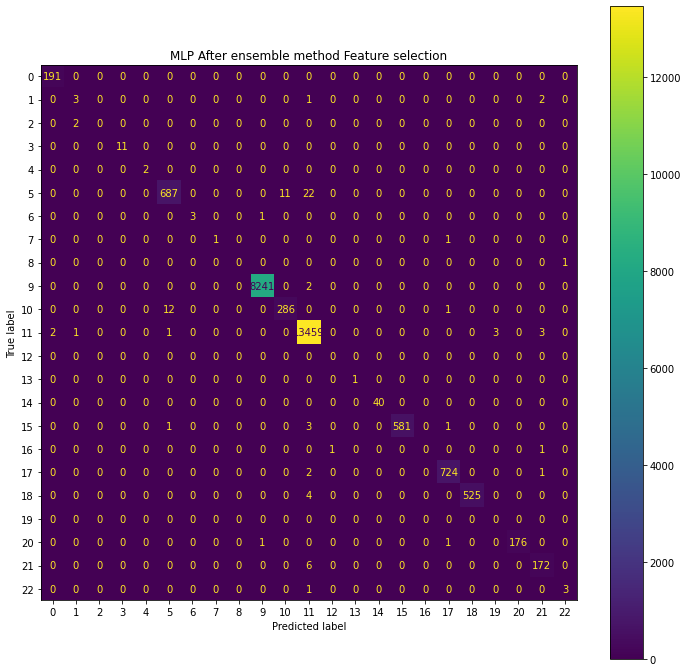

In [ ]:
# first the mlp classifier

mlp_clf = MLPClassifier(random_state = 42, max_iter = 100, hidden_layer_sizes = (100, 200), alpha= 0.0001, solver='adam')

mlp_clf.fit(new_X_train, y_train)

y_pred = mlp_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_mlp = f1_score(y_test, y_pred, average='weighted')
rfe_features.append(['MLP', F1_mlp])

evaluate_model(mlp_clf, new_X_test, y_test, 'MLP After ensemble method Feature selection')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       1.00      0.50      0.67         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2
           5       0.75      0.88      0.81       720
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.99      1.00      0.99      8243
          10       0.83      0.15      0.25       299
          11       0.93      0.97      0.95     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.65      0.75      0.70       586
          16       0.00      0.00      0.00         2
          17       0.73      0.63      0.68       727
          18       1.00    

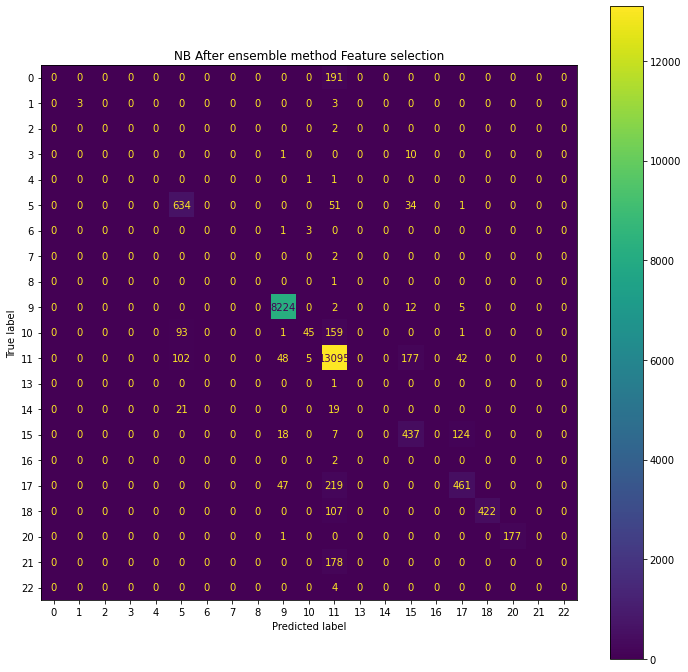

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(new_X_train, y_train)

y_pred = nb_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

evaluate_model(nb_clf, new_X_test, y_test, 'NB After ensemble method Feature selection')

F1_NB = f1_score(y_test, y_pred, average='weighted')

rfe_features.append(['NB', F1_NB])


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.57      0.67      0.62         6
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         2
           5       0.99      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.97      0.98      0.97       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        40
          15       1.00      0.99      1.00       586
          16       0.00      0.00      0.00         2
          17       1.00    

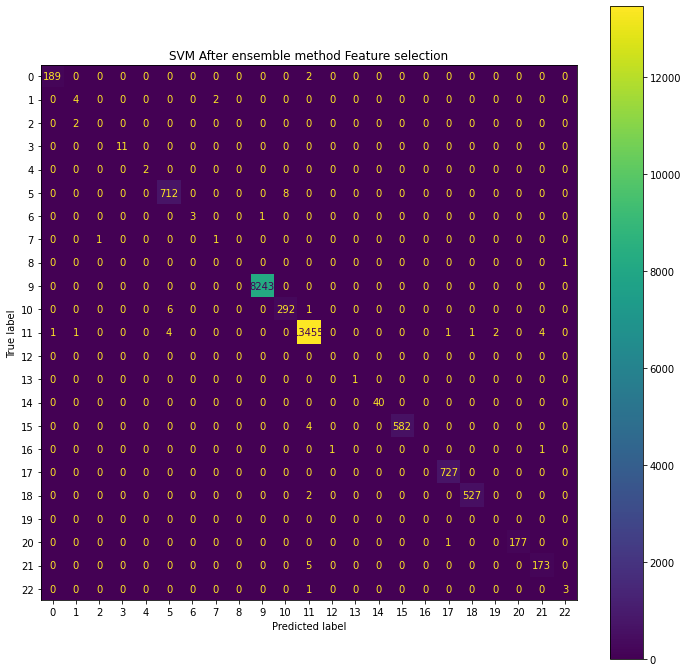

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42, C=100, gamma=1)

svm_clf.fit(new_X_train, y_train)

y_pred = svm_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_SVM = f1_score(y_test, y_pred, average='weighted')

rfe_features.append(['SVM', F1_SVM])

evaluate_model(svm_clf, new_X_test, y_test, 'SVM After ensemble method Feature selection')


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       191
           1       1.00      0.83      0.91         6
           2       0.00      0.00      0.00         2
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         2
           5       0.99      0.99      0.99       720
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.99      0.97      0.98       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      0.97      0.99        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       1.00    

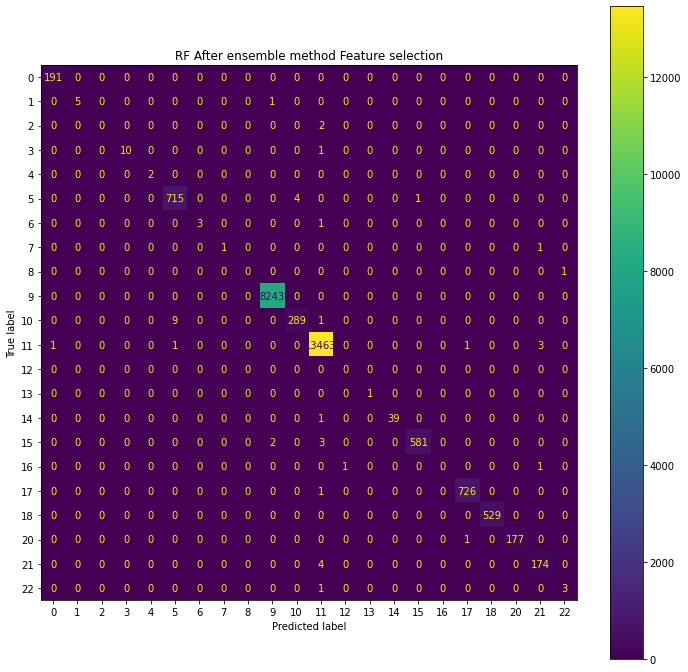

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42, n_estimators=128, max_depth=None)

rf_clf.fit(new_X_train, y_train)

y_pred = rf_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_RF = f1_score(y_test, y_pred, average='weighted')

rfe_features.append(['RF', F1_RF])

evaluate_model(rf_clf, new_X_test, y_test, 'RF After ensemble method Feature selection')


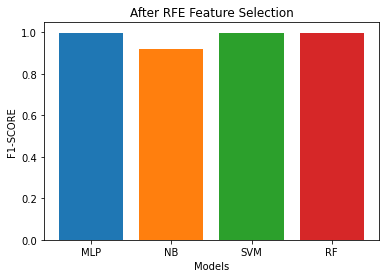

In [ ]:
plotModels(rfe_features, 'After RFE Feature Selection', 'Models', 'F1-SCORE')

In [ ]:
print('F1 score for each model was:')
rfe_features


F1 score for each model was:


[['MLP', 0.9964254257763321],
 ['NB', 0.9210445035328171],
 ['SVM', 0.9978937968237354],
 ['RF', 0.9981999744398705]]

## new feature selection method for future work (under construction)

In [ ]:
def fs_method(X, y, model):
  all_columns = list(X.columns)

  all_columns = random.sample(all_columns, len(all_columns))
  drop_list = []

  # if len(all_columns) % 2 == 1:
  #   drop_list.append(all_columns[len(all_columns - 1)])
  #   all_columns.pop()

  # forming the pairs
  pairs = []
  current_size = 2

  while len(all_columns) > 1:
    pair = [all_columns[0], all_columns[1]]
    pairs.append(pair)
    del all_columns[0]
    del all_columns[0]
  
  if len(all_columns) == 1:
    pairs.append(all_columns[0])

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, 
                                                        random_state=42,stratify=y)

  while len(pairs) > 1:
    print("current pairs: ", pairs)
    # test each pair on the model
    min_index = -1
    min_f1score = 1

    for i in range(len(pairs)):
      model = model.fit(X_train.loc[:,pairs[i]], y_train)
      y_pred = model.predict(X_test.loc[:,pairs[i]])
      f1score = f1_score(y_pred, y_test, average='weighted')

      if f1score < min_f1score:
        min_f1score = f1score
        min_index = i

    # remove the pair with the min f1 score
    drop_list.append(pairs[min_index])
    del pairs[min_index]

    # create the new pairs
    current_size = current_size + 1
    remaining_cols = [item for sublist in pairs for item in sublist]
    remaining_cols = random.sample(remaining_cols, len(remaining_cols))
    
    pairs = []
    while len(remaining_cols) > current_size - 1:
      pair = []
      for i in range(current_size):
        pair.append(remaining_cols[0])
        del remaining_cols[0]

      pairs.append(pair)

    if len(remaining_cols) > 0:
      pair = []
      for i in range(len(remaining_cols)):
        pair.append(remaining_cols[0])
        del remaining_cols[0]

      pairs.append(pair)

  
  return pairs

In [ ]:
df = fs_method(nsl_X_train, nsl_y_train, mlp_clf)

current pairs:  [['srv_rerror_rate', 'srv_count'], ['num_failed_logins', 'serror_rate'], ['dst_host_diff_srv_rate', 'duration'], ['dst_host_srv_diff_host_rate', 'num_shells'], ['logged_in', 'srv_serror_rate'], ['dst_host_srv_rerror_rate', 'dst_bytes'], ['num_file_creations', 'count'], ['num_compromised', 'su_attempted'], ['num_access_files', 'num_root'], ['dst_host_same_srv_rate', 'same_srv_rate'], ['land', 'wrong_fragment'], ['rerror_rate', 'dst_host_count'], ['dst_host_rerror_rate', 'is_host_login'], ['level', 'srv_diff_host_rate'], ['hot', 'root_shell'], ['service', 'urgent'], ['src_bytes', 'protocol_type'], ['dst_host_srv_count', 'diff_srv_rate'], ['dst_host_srv_serror_rate', 'dst_host_serror_rate'], ['dst_host_same_src_port_rate', 'num_outbound_cmds'], ['flag', 'is_guest_login']]
current pairs:  [['dst_host_same_srv_rate', 'wrong_fragment', 'dst_host_same_src_port_rate'], ['rerror_rate', 'diff_srv_rate', 'num_compromised'], ['protocol_type', 'count', 'su_attempted'], ['logged_in',

In [ ]:
features_new_method = ['dst_host_rerror_rate', 'count', 'protocol_type', 'dst_host_srv_diff_host_rate', 'flag', 'srv_serror_rate', 'rerror_rate', 'dst_host_srv_count', 'dst_host_count', 'su_attempted', 'level', 'dst_host_serror_rate', 'same_srv_rate']

In [ ]:
rfee_features = []
new_X_train = X_train[features_new_method]
print('new shape', new_X_train.shape)
new_X_test = X_test[features_new_method]

new shape (90700, 13)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       191
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         2
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00         2
           5       0.98      0.92      0.95       720
           6       1.00      0.75      0.86         4
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.83      0.98      0.90       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      0.47      0.64        40
          15       1.00      0.97      0.98       586
          16       0.00      0.00      0.00         2
          17       0.98    

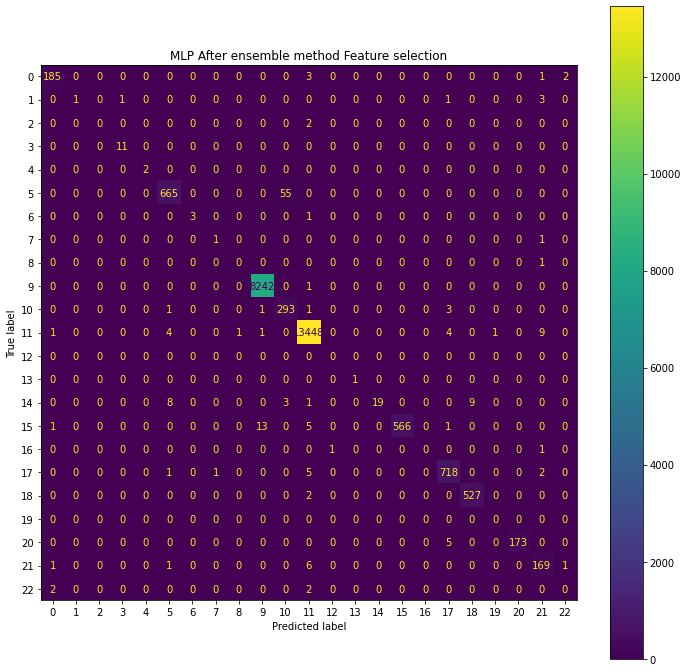

In [ ]:
# first the mlp classifier

mlp_clf = MLPClassifier(random_state = 42, max_iter = 100, hidden_layer_sizes = (100, 200), alpha= 0.0001, solver='adam')

mlp_clf.fit(new_X_train, y_train)

y_pred = mlp_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_mlp = f1_score(y_test, y_pred, average='weighted')
rfee_features.append(['MLP', F1_mlp])

evaluate_model(mlp_clf, new_X_test, y_test, 'MLP After ensemble method Feature selection')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         2
           5       0.95      0.15      0.27       720
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.95      0.84      0.89      8243
          10       0.00      0.00      0.00       299
          11       0.85      0.99      0.92     13469
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        40
          15       0.76      0.72      0.74       586
          16       0.00      0.00      0.00         2
          17       0.16      0.35      0.22       727
          18       0.00    

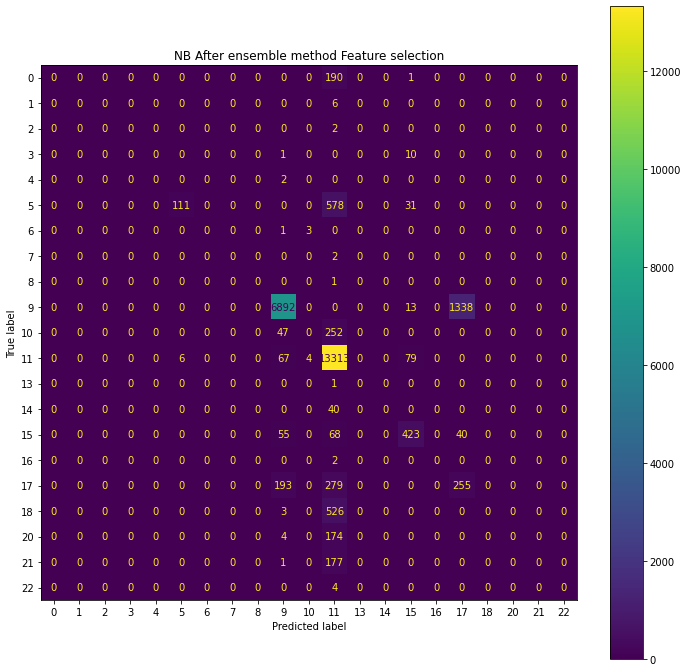

In [ ]:
# second the multinomial naive bayes

nb_clf = MultinomialNB()

nb_clf.fit(new_X_train, y_train)

y_pred = nb_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

evaluate_model(nb_clf, new_X_test, y_test, 'NB After ensemble method Feature selection')

F1_NB = f1_score(y_test, y_pred, average='weighted')

rfee_features.append(['NB', F1_NB])


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       191
           1       0.50      0.67      0.57         6
           2       0.00      0.00      0.00         2
           3       0.91      0.91      0.91        11
           4       0.67      1.00      0.80         2
           5       0.98      0.94      0.96       720
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.87      0.99      0.92       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       0.96      0.65      0.78        40
          15       1.00      0.98      0.99       586
          16       0.00      0.00      0.00         2
          17       0.99    

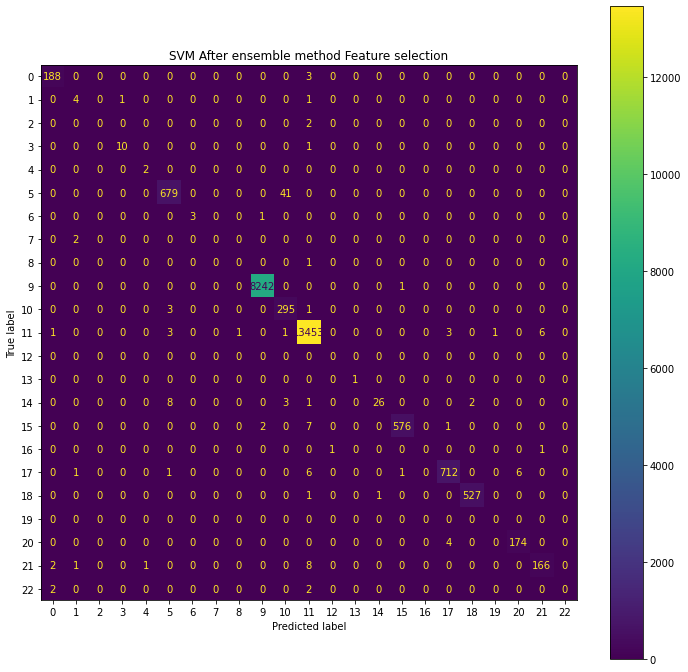

In [ ]:
# third the SVM model

svm_clf = SVC(random_state = 42, C=100, gamma=1)

svm_clf.fit(new_X_train, y_train)

y_pred = svm_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_SVM = f1_score(y_test, y_pred, average='weighted')

rfee_features.append(['SVM', F1_SVM])

evaluate_model(svm_clf, new_X_test, y_test, 'SVM After ensemble method Feature selection')


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.60      0.50      0.55         6
           2       0.00      0.00      0.00         2
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00         2
           5       0.95      0.95      0.95       720
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      8243
          10       0.90      0.91      0.90       299
          11       1.00      1.00      1.00     13469
          12       0.00      0.00      0.00         0
          13       0.50      1.00      0.67         1
          14       0.92      0.88      0.90        40
          15       1.00      0.99      0.99       586
          16       0.00      0.00      0.00         2
          17       0.99    

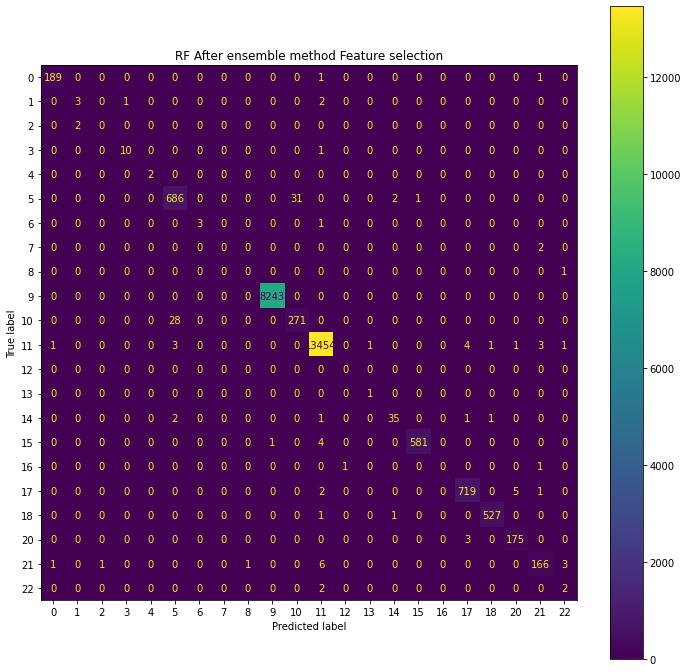

In [ ]:
# fourth the random forest classifier

rf_clf = RandomForestClassifier(random_state = 42, n_estimators=128, max_depth=None)

rf_clf.fit(new_X_train, y_train)

y_pred = rf_clf.predict(new_X_test)

print(classification_report(y_test, y_pred))

F1_RF = f1_score(y_test, y_pred, average='weighted')

rfee_features.append(['RF', F1_RF])

evaluate_model(rf_clf, new_X_test, y_test, 'RF After ensemble method Feature selection')


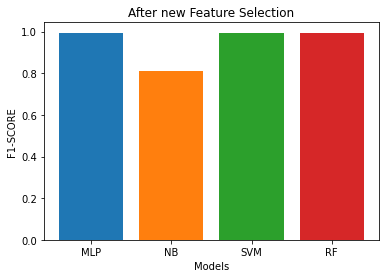

In [ ]:
plotModels(rfee_features, 'After new Feature Selection', 'Models', 'F1-SCORE')

In [ ]:
print('F1 score for each model was:')
rfee_features


F1 score for each model was:


[['MLP', 0.9930020359765185],
 ['NB', 0.8112187146142826],
 ['SVM', 0.9943993872056649],
 ['RF', 0.9948704764437829]]